<table>
    <td>
        <img src="https://ciadaconcepcao.com.br/wp-content/uploads/2017/01/innohub-270x270.png" style="width: 100px">
    </td>
    <td>
        <img src="https://i.ibb.co/vJ858Kg/ets-logo2.png" style="width: 200px">
    </td>
</table>


# <center>Treinamento Iot  - Módulo II</center>
## <center>Aula 5 - Matplotlib</center>



<img src="https://matplotlib.org/3.3.3/_static/logo2_compressed.svg">

O matplotlib http://matplotlib.org/ org/) é uma biblioteca do Python para criação de gráficos em 2D ,
muito utilizado para visualização de dados e que apresenta uma série de possibilidades gráficas,
como gráficos de barra, linha, pizza, histogramas, entre muitos outros.

Vamos começar importando o dataset.
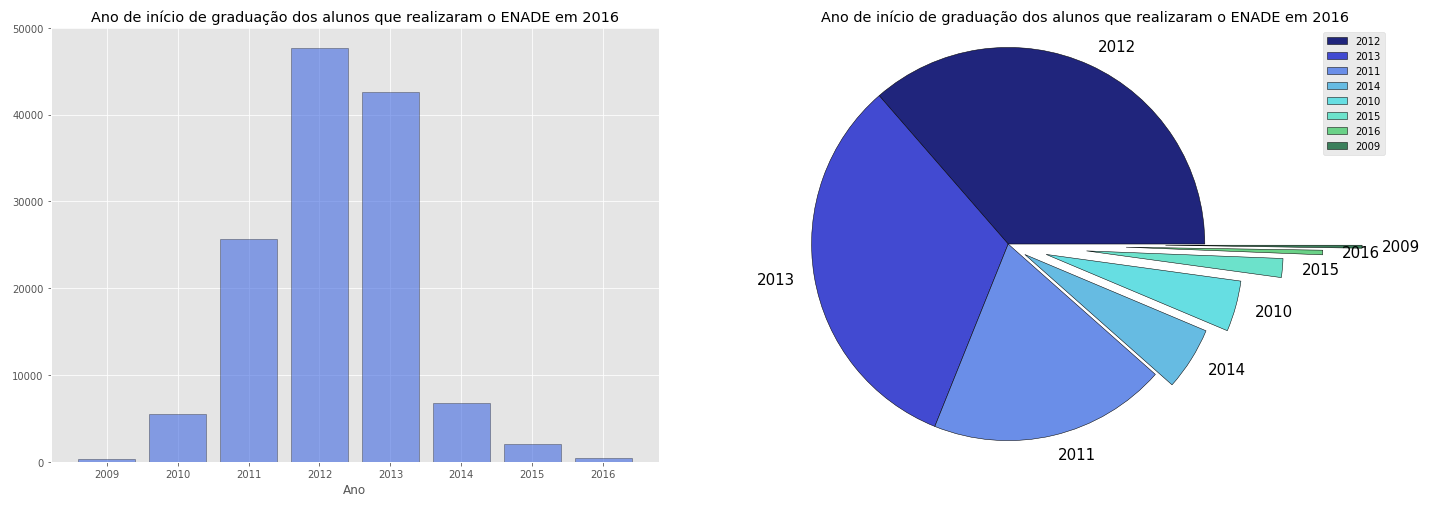

In [ ]:
import pandas as pd

: 

In [ ]:
df = pd.read_csv('respiradores.csv')
df

: 

O dataset mostra a quantidade de respiradores comprados por cada estado brasileiro em cada mês da pandemia.

## Importando a biblioteca

O modo mais comum de chamar a biblioteca é usando o alias **plt**.

In [ ]:
import matplotlib.pyplot as plt

: 

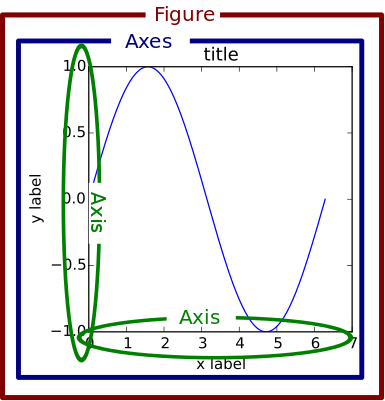

## Gráfico de barras

Vamos começar fazendo um gráfico de barras, para ver a quantidade total de respiradores comprados em cada mês no Brasil.<br>
O gráfico de barras é um tipo de gráfico categórico, um eixo apresenta as categorias e o outro os valores<br>
ax.bar(x, height, width, bottom, align)

In [ ]:
x=df.MES
altura=df.TOTAL
plt.bar(x,altura, 1.5,align= "center", edgecolor="black" )
plt.title("COMPRA DE RESPIRADORES POR MÊS")
plt.xticks(rotation = '90')
plt.yticks(rotation = '45')
plt.show()
help(plt.bar)

: 

In [ ]:
total_por_estado = df.sum()[1:-1]
total_por_estado

: 

In [ ]:
x=df.columns[1:-1]
plt.bar(x, total_por_estado, color = 'black', zorder=3)
plt.title('COMPRA DE RESPIRADORES POR ESTADO')
plt.xticks(rotation='vertical')
plt.grid(zorder=0)
plt.show()


: 

Podemos fazer o gráfico de barras na horizontal também:

In [ ]:
plt.barh(df.MES,df.TOTAL, color = 'purple')
plt.title('COMPRA DE RESPIRADORES POR MÊS')
plt.show()

: 

## Gráfico de linha

Usamos a função **plot** para fazer gráficos de linha:

In [ ]:
plt.plot(df.MES,df.PARANA)
plt.xticks(rotation='45')
plt.grid(linestyle='dashed')
plt.title("COMPRA DE RESPIRADORES POR MÊS NO PARANÁ")
plt.show()

: 

### Podemos passar argumentos na função para personalizar nosso gráfico

plt.plot(df.MES,df.PARANA, color = 'purple', marker='x', linewidth = 3, markersize=10)
plt.xticks(rotation='45')
plt.title("COMPRA DE RESPIRADORES POR MÊS NO PARANÁ")
plt.grid(linestyle='dashed')
plt.show()

Vamos ver alguns argumentos usando o **help**.

In [ ]:
help(plt.plot)

: 

### Para adicionar mais curvas no mesmo gráfico:

In [ ]:
plt.plot(df.MES,df.PARANA,marker='o', label = 'Paraná')
plt.plot(df.MES,df['SÃO PAULO'],marker='o', label = 'São Paulo')
plt.plot(df.MES,df['SANTA CATARINA'],marker='o', label = 'Santa Catarina')
plt.legend()
plt.xticks(rotation='45')
plt.grid(linestyle='dashed')
plt.show()

: 

## Gráfico de dispersão (Scatter plot)

In [ ]:
plt.scatter(df['MES'],df['PARANA'], label = 'Paraná')
plt.scatter(df['MES'],df['SANTA CATARINA'], label = 'Santa Catarina')
plt.scatter(df['MES'],df['GOIAS'], label = 'Goiás')
plt.scatter(df['MES'],df['PERNAMBUCO'], label = 'Pernambuco')
plt.scatter(df['MES'],df['AMAPA'], label = 'Amapá')
plt.legend() #fontsize=10 / prop={"size":10}
plt.title("")
plt.xticks(rotation=45)
plt.show()
help(plt.legend)

: 

## Subplots

Podemos criar uma figura contendo uma matriz de gráficos dentro dela, para isso utilizamos o **subplots**, informando o número de colunas e de linhas. A função retorna dois valores, o primeiro se refere à própria figura, a segunda é um array de gráficos, onde podemos acessar cada um por indexação.

In [ ]:
fig, eixo = plt.subplots(nrows = 2, ncols = 2, figsize = (20,20))
eixo[0][0].bar(df.MES,df.TOTAL)
eixo[0][1].bar(df.columns[1:-1],df.sum()[1:-1])
eixo[1][0].scatter(df['MES'],df['GOIAS'], label = 'Goiás')
eixo[1][1].plot(df.MES,df.PARANA, color = 'purple', marker='x', linewidth = 3, markersize=10)

eixo[0][0].set_title("Oi")
eixo[0][0].set_ylabel("Ola")
eixo[0][0].tick_params(axis='x',  labelrotation=45) # os métodos dos eixos de subplots são diferentes das funções do plot
eixo[0][1].tick_params(axis='x', labelrotation=90)
eixo[1][0].tick_params(axis='x', labelrotation=45) # os métodos dos eixos de subplots são diferentes das funções do plot
eixo[1][1].tick_params(axis='x', labelrotation=90)



: 

## Gráfico de pizza

#### Vamos analisar a proporção de compra de respiradores entre os estados da região Sul do Brasil.

Primeiro vamos separar um dataset somente com os dados desses estados:

In [ ]:
estados_sul = df.loc[:,['PARANA','SANTA CATARINA','RIO GRANDE DO SUL ']]
estados_sul

: 

Agora podemos plotar esses dados num gráfico de pizza, utilizando a função **pie**.

In [ ]:
estados_sul = df.loc[:,['PARANA','SANTA CATARINA','RIO GRANDE DO SUL ']]
print(estados_sul.sum())
def valor():
    x=estados_sul.sum()["PARANA"]
    y=estados_sul.sum()["SANTA CATARINA"]
    z=estados_sul.sum()["RIO GRANDE DO SUL "]
    return x,y,z
sizes=valor()

p, tx, autotexts = plt.pie(estados_sul.sum(), labels=estados_sul.columns, 
        autopct="", shadow=True)
print(autotexts)
for i, a in enumerate(autotexts):
    a.set_text("{}".format(sizes[i]))
    
#plt.pie(estados_sul.sum(), labels = estados_sul.columns, autopct=valor)
#plt.title('COMPRA DE RESPIRADORES NO SUL')
#plt.show()

: 

## Gráfico de múltiplas barras

Vamos usar um truque para deixar nossas barras deslocadas. Nos valores do eixo X, vamos deslocar cada valor 0.25 para esquerda, para a primeira barra, e 0.25 para a direita, para a segunda barra.

Assim conseguimos comparar facilmente a quantidade de respiradores comprados no Paraná em cada mês com a média brasileira (total de cada mês/ quantidade de estados).

In [ ]:
import numpy as np

: 

(11, 32)
[-0.25, 0.75, 1.75, 2.75, 3.75, 4.75, 5.75, 6.75, 7.75, 8.75, 9.75]
[0.25, 1.25, 2.25, 3.25, 4.25, 5.25, 6.25, 7.25, 8.25, 9.25, 10.25]
0      20.0
1       0.0
2     254.0
3     291.0
4      73.0
5      39.0
6      47.0
7     134.0
8     118.0
9       3.0
10     14.0
Name: PARANA, dtype: float64


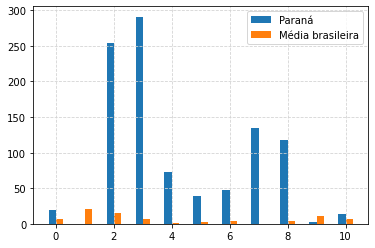

In [450]:
print(df.shape)
print([a-0.25 for a in range(df.shape[0])])
print([a+0.25 for a in range(df.shape[0])])
print(df.PARANA)
    
plt.bar([i-0.25 for i in range(df.shape[0])],df.PARANA, width = +0.25,
        label = 'Paraná', align = 'edge')

plt.bar([a+0.25 for a in range(df.shape[0])],df.TOTAL/30,width = -0.25,
       label = 'Média brasileira', align = 'edge')
plt.legend()
plt.grid(color='lightgray',linestyle='dashed')

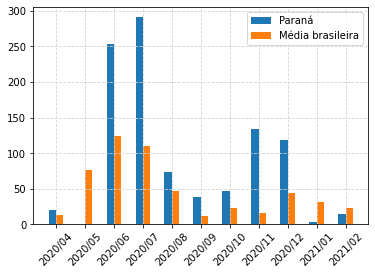

In [70]:
import numpy as np

plt.bar([a-0.25 for a in range(df.shape[0])],df.PARANA, width = 0.25,
        label = 'Paraná', align = 'edge')
plt.bar([a+0.25 for a in range(df.shape[0])],df.TOTAL/30,width = -0.25,
       label = 'Média brasileira', align = 'edge')
plt.xticks(np.arange(11),df.MES, rotation=45)
plt.legend()
plt.grid(color='lightgray',linestyle='dashed')

## Histogramas

Histogramas são gráficos de barras que apresentam a distribuição de uma variável dentro de um conjunto de dados. Vamos ver como se distribue o valor total de respiradores comprados em cada estado.

In [34]:
total_por_estado = df.iloc[:,1:-1].sum()
total_por_estado

ACRE                    230.0
ALAGOAS                 287.0
AMAPA                   137.0
AMAZONAS                673.0
BAHIA                  1061.0
CEARA                   364.0
DISTRITO FEDERAL        273.0
ESPIRITO SANTO          449.0
GOIAS                   939.0
HAITI                   100.0
LIBANO                  300.0
MARANHÃO                328.0
MATO GROSSO             272.0
MATO GROSSO DO SUL      360.0
MINAS GERAIS           1139.0
PARA                    535.0
PARAIBA                 462.0
PARANA                  993.0
PERNAMBUCO              303.0
PERU                    330.0
PIAUI                   260.0
RIO DE JANEIRO         1844.0
RIO GRANDE DO NORTE     330.0
RIO GRANDE DO SUL      1028.0
RONDONIA                349.0
RORAIMA                 212.0
SANTA CATARINA          363.0
SERGIPE                 186.0
SÃO PAULO              1222.0
TOCANTINS               230.0
dtype: float64

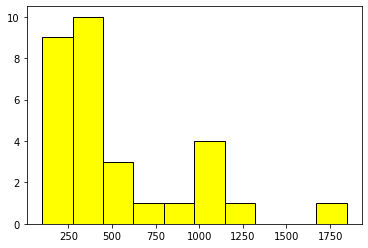

In [84]:
plt.hist(total_por_estado,ec='black',color='yellow')
plt.show()
# podemos ver que a maior parte dos estados comprou entre +- 100 a 500 respiradores

## Duplo eixo Y

Podemos adicionar um eixo Y ao nosso gráfico, assim conseguimos reaproveitar o mesmo eixo X para mostrar duas variáveis diferentes.

Text(0.5, 1.0, 'Compra de respiradores PARANÁ X Média brasileira')

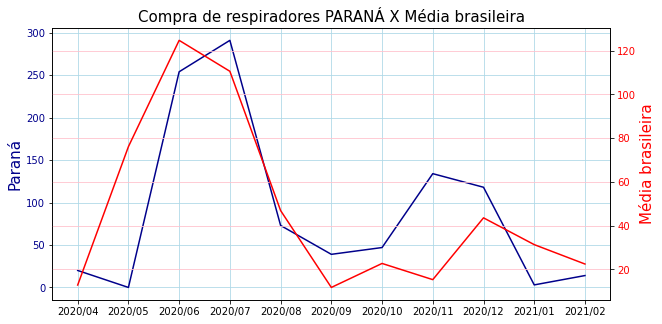

In [89]:
fig, eixo = plt.subplots(ncols=1,nrows=1,figsize=(10,5))
eixo.plot(df.MES,df.PARANA,label='Paraná', color='darkblue')

eixo2 = eixo.twinx()
eixo2.plot(df.MES,df.TOTAL/30,color='red')

eixo2.tick_params(axis='y', labelcolor='red')
eixo.tick_params(axis='y', labelcolor='darkblue')

eixo.set_ylabel("Paraná", color='darkblue',fontsize=15)
eixo2.set_ylabel("Média brasileira", color='red',fontsize=15)

eixo.grid(color='lightblue')
eixo2.grid(color='pink')

eixo.set_title('Compra de respiradores PARANÁ X Média brasileira', fontsize= 15)

### Nossa, esse gráfico ficou bonitão hein?
### Podemos salvá-lo como imagem:

In [338]:
fig.savefig('grafico_parana.png')

Note que eu quero salvar a figura inteira como imagem, por isso utilizamos a variável **fig** e não **eixo**.

## Desafio

Faça um gráfico que mostre a quantidade de respiradores comprados por região do Brasil. (por mês e total)

|Norte    |Nordeste           |Centro-Oeste      |Sudeste       |Sul              |
|---------|-------------------|------------------|--------------|-----------------|
|Amazonas |Maranhão           |Goiás             |Minas Gerais  |Santa Catarina   |
|Acre     |Piauí              |Mato Grosso       |Espírito Santo|Paraná           |
|Rondônia |Rio Grande do Norte|Mato Grosso do Sul|Rio de Janeiro|Rio Grande do Sul|
|Roraima  |Ceará              |Distrito Federal  |São Paulo     |                 |
|Amapá    |Paraíba            |                  |              |                 |
|Pará     |Bahia              |                  |              |                 |
|Tocantins|Pernambuco         |                  |              |                 |
|         |Alagoas            |                  |              |                 |
|         |Sergipe            |                  |              |                 |



![alt text](https://databootcamp.nyc3.digitaloceanspaces.com/img/desafio.jpg)

In [473]:
norte=df.loc[:, ["AMAZONAS", "AMAPA", "RORAIMA", "ACRE", "PARA", "RONDONIA", "TOCANTINS"]]
sul=df.loc[:, ["PARANA", "RIO GRANDE DO SUL ", "SANTA CATARINA"]]
def soma(linha, regiao):
    x=0
    for i in regiao.columns:
        x+=linha[i]
    return x

TotalNorte=df.apply(soma, axis=1, regiao=norte)
TotalSul=df.apply(soma, axis=1, regiao=sul)
print(TotalNorte.sum())
print(TotalSul.sum())

#plt.bar("Norte", df["TotalNorte"].sum())
#plt.show()








2366.0
2384.0


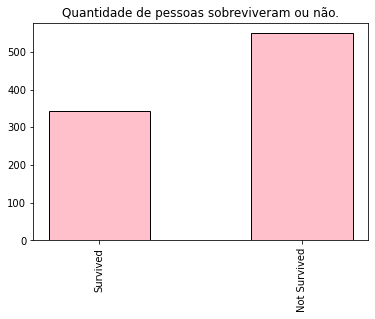

In [312]:
import pandas as pd
titanic = pd.read_csv("data/titanic_1_aula.csv")
x=[titanic.Survived[titanic["Survived"] == 1].count(), titanic.Survived[titanic["Survived"] == 0].count()]
y=["Survived", "Not Survived"]
plt.bar(y,x,0.5,align= "center", edgecolor="black", color="pink" )
plt.title("Quantidade de pessoas sobreviveram ou não.")
plt.xticks(rotation = '90')
plt.show()















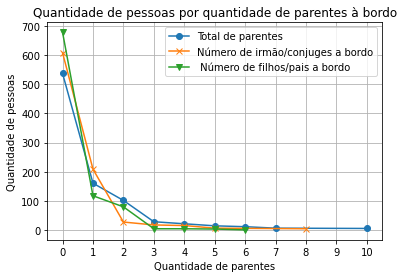

In [207]:
x=sorted(titanic["Relatives"].unique())
x2=sorted(titanic["SibSp"].unique())
x3=sorted(titanic["Parch"].unique())
y=titanic["Relatives"].value_counts()
y2=titanic["SibSp"].value_counts()
y3=titanic["Parch"].value_counts()
plt.plot(x,y, marker="o", label="Total de parentes")
plt.plot(x2,y2, marker="x", label="Número de irmão/conjuges a bordo")
plt.plot(x3,y3, marker="v", label=" Número de filhos/pais a bordo")
plt.legend() #fontsize=10 / prop={"size":10}
plt.xticks([ 0,1,2,3,4,  5,  6,  7,8,9, 10],rotation="horizontal")
plt.title("Quantidade de pessoas por quantidade de parentes à bordo")
plt.xlabel("Quantidade de parentes")
plt.ylabel("Quantidade de pessoas")
plt.grid()
plt.show()


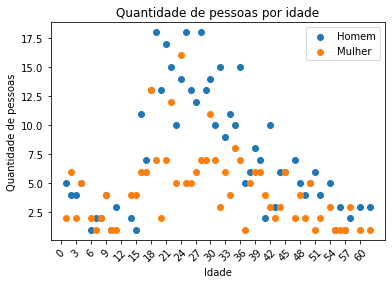

In [408]:
import numpy as np
x= sorted(round(titanic.Age[titanic["Sex"]=="male"].fillna(29)).unique())
x2= sorted(round(titanic.Age[titanic["Sex"]=="female"].fillna(29)).unique())
y= titanic[titanic["Age"]==25.0]

array=np.intersect1d(x,x2)


lista=[]
lista2=[]
titanic2=titanic[titanic["Sex"]=="male"]
index=list(titanic2.index)

for i in range(len(index)):
    y=titanic2.Age[index[i]]
    if y in array:
        lista.append(y)   
    
    
titanic3=titanic[titanic["Sex"]=="female"]
index=list(titanic3.index)

for i in range(len(index)):
    y=titanic3.Age[index[i]]
    if y in array:
        lista2.append(y)   

df=pd.DataFrame({"Age":lista})
df2=pd.DataFrame({"Age":lista2})

plt.scatter(array,df["Age"].value_counts().sort_index(), label = 'Homem')
plt.scatter(array,df2["Age"].value_counts().sort_index(), label = 'Mulher')
plt.legend() #fontsize=10 / prop={"size":10}
plt.xticks(np.arange(0,63,3),rotation=45)
plt.title("Quantidade de pessoas por idade")
plt.xlabel("Idade")
plt.ylabel("Quantidade de pessoas")
plt.show()
